# Revisiting Derivatives


Your review for derivatives is that the exact derivative is as follows,:

$\frac{df}{dx}=\lim_{\Delta x\rightarrow0}\frac{f(x+\Delta x)-f(x)}{\Delta x}$

where $f=f(x)$. In your lessons on initial value problems, you approximated this derivative by removing the $\lim_{\Delta t \rightarrow 0}.$ When you describe derivatives over space, you use the same approximation, but in this notebook you will try a few other alternatives. The following approximation is called a forward difference derivative, 

$\frac{\Delta f}{\Delta x}\approx\frac{f(x+\Delta x)-f(x)}{\Delta x},$

because you approximate $\frac{df}{dx}$ using the current $f(x)$ and the forward step, $f(x+\Delta x)$ as the derivative.


## Taylor Series Expansion


The approximation of the __truncation error__ in the function near $x_{i}$ is given as:

$f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2+...$

where $f'=\frac{df}{dx}$ and $x_{i+1} = x_{i}+h.$


You determine the first order derivative by solving for $f'(x_{i})$:

$f'(x_{i})=\frac{f(x_{i+1})-f(x_{i})}{h}-\frac{f''(x_{i})}{2!}h+...$

The __truncation error__ error is on the order of the timestep, $h$. This is commonly represented in big-O notation as  $error\approx O(h)$

$f'(x_{i})=\frac{f(x_{i+1})-f(x_{i})}{h}+O(h)$


### Higher order derivatives

You have already solved first-order numerical derivatives problems in [Project_01](https://github.uconn.edu/rcc02007/CompMech01-Getting-started/blob/master/project/01_Getting-started-project.ipynb) and [CompMech03-IVPs](https://github.uconn.edu/rcc02007/CompMech03-IVPs). Now, you will look at higher order derivatives. Let's start with $\frac{d^2f}{dx^2}=f''(x)$. We need more information. 

First, take the function near $x_{i}$ within 1 step, $h$, given as:

$f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2+...$

Next, take the function near $x_{i}$ within 2 steps, $2h$, given as: 

$f(x_{i+2})=f(x_{i})+f'(x_{i})2h+\frac{f''(x_{i})}{2!}4h^2+...$

solving for $f''(x_{i})$ by subtracting $f(x_{i+2})-2f(x_{i+1})$ to eliminate $f'(x_{i})$:

$f''(x_{i})=\frac{f(x_{i+2})-2f(x_{i+1})-3f(x_{i})}{h^2}+O(h)$

Here you have the numerical second derivative of a function, $f(x)$, with __truncation error__ of $\approx O(h)$

## Using your numerical derivatives

Consider the example of taking the derivative of $f(x) = \sin(x)$ with only 10 data points per period. Let's assume there is no random error in the signal. First, you can plot the values you expect since you know the derivatives of $\sin(x)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3

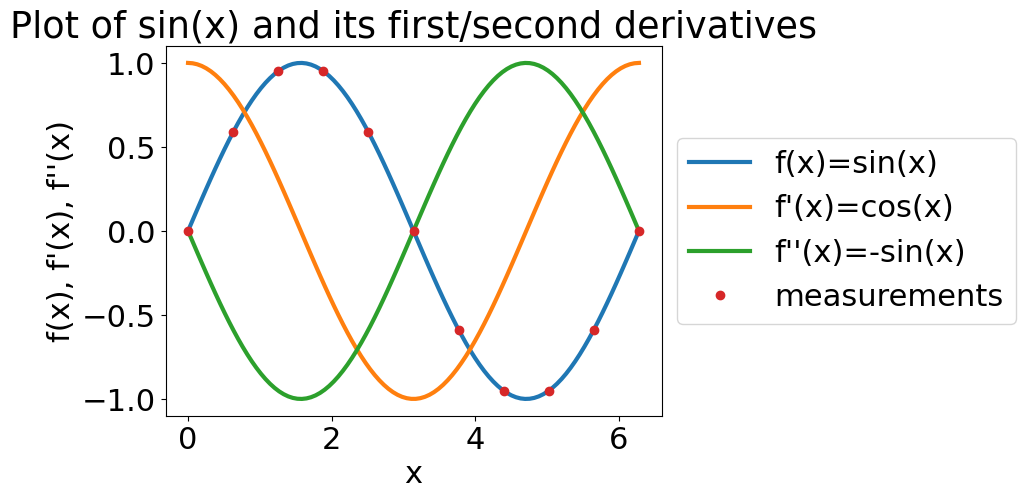

In [2]:
x=np.linspace(0,2*np.pi,11)
xx=np.linspace(0,2*np.pi,100)
## analytical derivatives
y=np.sin(x)
dy=np.cos(xx)
ddy=-np.sin(xx)
plt.plot(xx,np.sin(xx),label='f(x)=sin(x)')
plt.plot(xx,dy,label='f\'(x)=cos(x)')
plt.plot(xx,ddy,label='f\'\'(x)=-sin(x)')
plt.plot(x,y,'o',label='measurements')
plt.legend(bbox_to_anchor=(1,0.5),loc='center left')
plt.title('Plot of sin(x) and its first/second derivatives')
plt.xlabel('x')
plt.ylabel('f(x), f\'(x), f\'\'(x)');

Next, you use your definitions for first and second derivatives to get the approximate derivatives, $f'(x)~and~f''(x)$. You are using a forward difference method so for $f'(x)$ you truncate the values by 1 and for $f''(x)$, you truncate the values by 2.

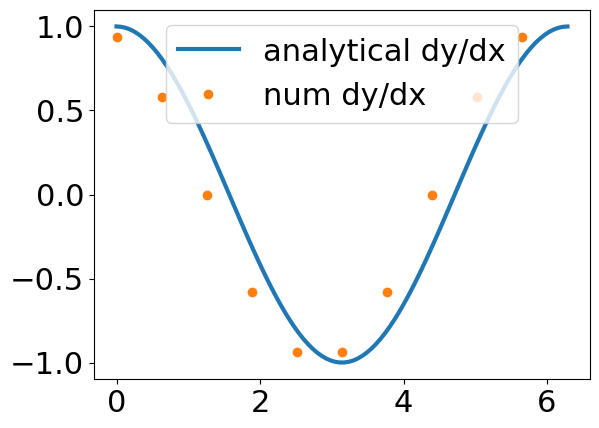

In [3]:
## numerical derivatives
dy_n=(y[1:]-y[0:-1])/(x[1:]-x[0:-1]);
ddy_n=(y[2:]-2*y[1:-1]+y[0:-2])/(x[2:]-x[1:-1])**2;

plt.plot(xx,dy,label='analytical dy/dx')
plt.plot(x[:-1],dy_n,'o',label='num dy/dx')
plt.legend();

### Exercise

What is the maximum error between the numerical $\frac{df}{dx}$ and the actual $\frac{df}{dx}$?

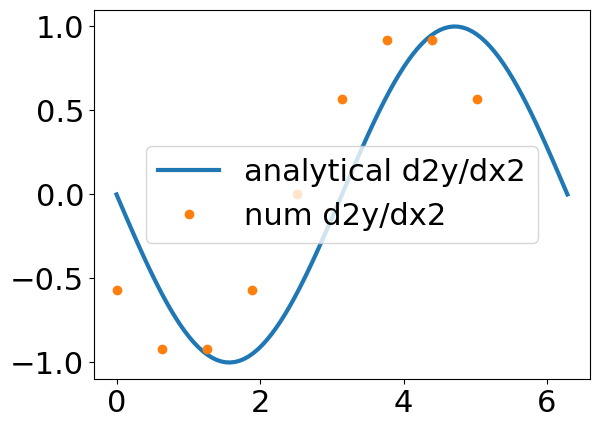

In [4]:
plt.plot(xx,ddy,label='analytical d2y/dx2')
plt.plot(x[:-2],ddy_n,'o',label='num d2y/dx2')
plt.legend();

Your stepsize is $h=\pi/5\approx 0.6$. Looking at the graphs, it looks like you are shifting your function to the left by using this forward difference method. That is because you are using a forward difference method, the derivative is going to be averaged between step $i$ and $i+1$. The result is that you shift the function by $h/2$ for each derivative. 

## Exercise

Another first-order, $error\approx O(h)$, derivative is the backward difference derivative, where

$f'(x_{i})=\frac{f(x_{i})-f(x_{i-1})}{h}+O(h)$

$f''(x_{i})=\frac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2}+O(h)$

Plot the first and second derivatives of $\sin(x)$ using the same x-locations as you did above.

## Central Difference
### Increase accuracy with more points

Both the forward and backward difference methods have the same $error\approx O(h)$, _but you can do better._ Let's rewrite Taylor series of the function, $f(x)$,  near $x_{i}$ is given as:

forward:

$f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2-\frac{f'''(x_{i})}{3!}h^3+...$

backward:

$f(x_{i-1})=f(x_{i})-f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2-\frac{f'''(x_{i})}{3!}h^3+...$

Now, you subtract $f(x_{i+1})-f(x_{i-1})$, then solve for $f'(x_{i})$, as such

$f'(x_{i})=\frac{f(x_{i+1})-f(x_{i-1})}{2h}+O(h^{2}).$

The result is that the __truncation error__ has been reduced to $\approx O(h^2).$ Take a look at the new function. The derivative is based upon the two closest points, $x_{i-1}~and~x_{i+1}$, but not $x_{i}$. 

This approximation is called the __central difference method__. You can also apply it to second derivatives as such

forward: 

$f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2-\frac{f'''(x_{i})}{3!}h^3+...$

backward:

$f(x_{i-1})=f(x_{i})-f'(x_{i})h+\frac{f''(x_{i})}{2!}h^2-\frac{f'''(x_{i})}{3!}h^3+...$


Finally, you add $f(x_{i+1})+f(x_{i-1})$ to eliminate $f'(x_i)$ and solve for $f''(x_i)$ as such

$f''(x_{i}) = \frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2} + O(h^2).$

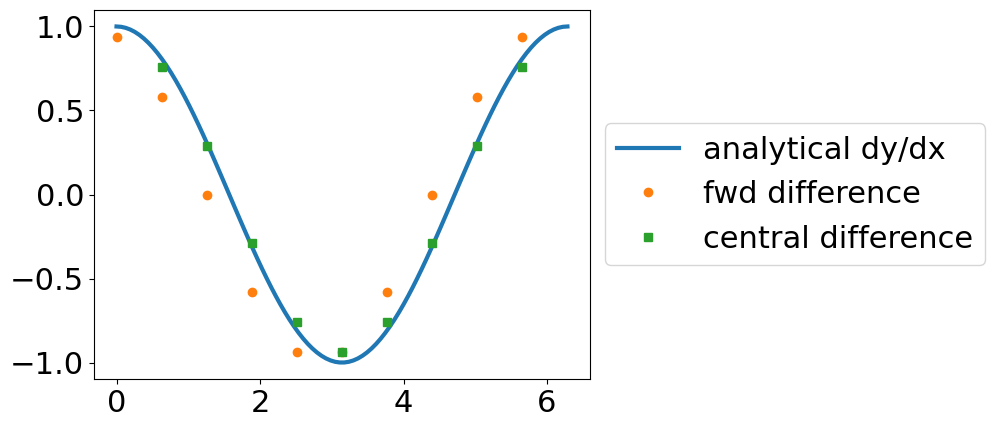

In [5]:
x=np.linspace(0,2*np.pi,11);
## analytical derivatives
y=np.sin(x);
dy=np.cos(xx);
ddy=-np.sin(xx);

## forward difference
dy_f=(y[1:]-y[:-1])/(x[1:]-x[:-1]);
## central difference
dy_c=(y[2:]-y[:-2])/(x[2:]-x[:-2]);

plt.plot(xx,dy,label='analytical dy/dx')
plt.plot(x[:-1],dy_f,'o',label='fwd difference')
plt.plot(x[1:-1],dy_c,'s',label='central difference')
plt.legend(bbox_to_anchor=(1,0.5),loc='center left');

### Exercise

Plot the analytical, forward difference, and central difference results for the second derivative of $\sin(x)$. 

## Higher order derivatives

You use the following chart for commonly found derivatives and the corresponding Forward, Backward, and Central difference approximations. In practice, you should use __central difference__ approximations because they reduce the truncation error from $O(h)\rightarrow O(h^2)$ without using more data points to calculate the derivative. 

__Table of derivatives and the corresponding forward, backward, and central difference method equations.__

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="" xml:lang="">
<head>
  <meta charset="utf-8" />
  <meta name="generator" content="pandoc" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes" />
  
  <style>
    code{white-space: pre-wrap;}
    span.smallcaps{font-variant: small-caps;}
    span.underline{text-decoration: underline;}
    div.column{display: inline-block; vertical-align: top; width: 50%;}
    div.hanging-indent{margin-left: 1.5em; text-indent: -1.5em;}
    ul.task-list{list-style: none;}
  </style>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" type="text/javascript"></script>
  <!--[if lt IE 9]>
    <script src="//cdnjs.cloudflare.com/ajax/libs/html5shiv/3.7.3/html5shiv-printshiv.min.js"></script>
  <![endif]-->
</head>
<body>
<table>
<colgroup>
<col style="width: 17%" />
<col style="width: 24%" />
<col style="width: 24%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header">
<th>Derivative</th>
<th>Forward <span class="math inline">\(O(h)\)</span></th>
<th>Backward <span class="math inline">\(O(h)\)</span></th>
<th>Central <span class="math inline">\(O(h^2)\)</span></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><span class="math inline">\(\frac{df}{dx}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i+1})-f(x_i)}{h}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i})-f(x_{i-1})}{h}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i+1})-f(x_{i-1})}{2h}\)</span></td>
</tr>
<tr class="even">
<td><span class="math inline">\(\frac{d^2f}{dx^2}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i+2})-2f(x_{i+1})+f(x_{i})}{h^2}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i})-2f(x_{i-1})+f(x_{i-2})}{h^2}\)</span></td>
<td><span class="math inline">\(\frac{f(x_{i+1})-2f(x_{i})+f(x_{i-1})}{h^2}\)</span></td>
</tr>
<tr class="odd">
<td><span class="math inline">\(\frac{d^3f}{dx^3}\)</span></td>
<td><span class="math inline">\(\frac{f (x_{i+3} ) − 3 f (x_{i+2} ) + 3 f (x_{i+1} ) − f(x_{ i} )}{h^3}\)</span></td>
<td><span class="math inline">\(\frac{f (x_i ) − 3 f (x_{i−1} ) + 3 f (x_{i−2} ) − f (x_{i−3})}{h^3}\)</span></td>
<td><span class="math inline">\(\frac{f (x_{i+2} ) − 2 f (x_{ i+1} ) + 2 f (x_{i−1} ) − f (x_{i−2} )}{2h^3}\)</span></td>
</tr>
<tr class="even">
<td><span class="math inline">\(\frac{d^4f}{dx^4}\)</span></td>
<td><span class="math inline">\(\frac{f (x_{i+4} ) − 4 f (x_{i+3} ) + 6 f (x_{i+2} ) − 4 f (x_{i+1} ) + f (x_{i} )}{h^4}\)</span></td>
<td><span class="math inline">\(\frac{f (x_i ) − 4 f (x_{i−1} ) + 6 f (x_{i−2} ) − 4 f (x_{i−3} ) + f (x_{i−4} )}{h^4}\)</span></td>
<td><span class="math inline">\(\frac{f (x_{i+2} ) − 4 f (x_{i+1} ) + 6 f (x_{i} ) − 4 f (x_{i−1} ) + f (x_{i−2} )}{h^4}\)</span></td>
</tr>
</tbody>
</table>
</body>
</html>

## What You've Learned

* How to approximate error in approximate derivatives
* How to approximate derivatives using forward difference methods
* How to approximate derivatives using backward difference methods
* How to approximate derivatives using central difference methods
* How to approximate higher order derivatives with forward, backward, and central differences